In [116]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from pathlib import Path

In [156]:
sea_levels_path = 'cleanedsealevel.csv'
migration = 'census-county-to-county-migration.csv'
censuspop = 'census-population.xlsx'
zillow = 'zprop.csv'
odnpop = 'ODN_Population_20240129.csv'
weather = 'weather.csv'
inflation = 'DP_LIVE_04022024012624347.csv'

In [157]:
sea_levels= pd.read_csv(sea_levels_path)
migrations= pd.read_csv(migration)
pvals = pd.read_csv(zillow)
pop = pd.read_csv(odnpop)
wtemp = pd.read_csv(weather)
infl = pd.read_csv(inflation)

In [20]:
#Information:
#https://www.zillow.com/research/data/
#Home Values (Single Family Homes) sorted geographically by county
pvals

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,208453.080524,...,804802.541310,801021.907927,803549.432152,810316.308955,821345.498959,834884.912014,848342.362212,859321.896663,867528.209805,872695.048413
1,139,1,Cook County,county,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",17,31,146516.213789,...,289927.709298,291803.759952,293392.842156,295102.848442,297014.709471,299235.790651,300970.253144,302316.658271,303244.721991,303884.658933
2,1090,2,Harris County,county,TX,TX,"Houston-The Woodlands-Sugar Land, TX",48,201,109838.425455,...,279006.326508,278393.382584,278375.563868,279008.874039,279781.713606,280585.152352,280917.629885,280960.340996,280717.100572,280439.814641
3,2402,3,Maricopa County,county,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",4,13,144914.772450,...,454472.317136,453596.967878,454557.524068,456670.719212,459517.807325,462532.532365,465036.625805,467246.154538,469054.475581,470036.354079
4,2841,4,San Diego County,county,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",6,73,224488.557842,...,870406.450342,874328.164080,881971.721215,892253.850546,904473.400076,917054.125155,929238.112429,939224.545274,946028.121656,949603.992802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,846,3206,Banner County,county,NE,NE,"Scottsbluff, NE",31,7,NaN,...,286495.485328,288963.144908,293404.646124,297982.937945,303221.568679,308324.293100,312531.028460,316194.328152,318241.617684,318700.497331
3072,1648,3207,Daggett County,county,UT,UT,NaN,49,9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307588.203336,306735.806453,306030.886931
3073,1432,3208,Thomas County,county,NE,NE,NaN,31,171,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129634.834614,129173.045077
3074,2794,3212,McPherson County,county,NE,NE,"North Platte, NE",31,117,NaN,...,238631.791013,239907.502218,243713.320855,247472.453259,251510.668543,255606.446130,259303.491520,262310.137508,264384.559066,266216.985756


In [151]:
#Selecting counties of interest from Zillow data
nccount = pvals.loc[pvals['RegionName'].isin(['Hyde County', 'Dare County', 'Carteret County'])]
nccount

ncvals = nccount.melt(id_vars=["RegionName", "StateName"], 
        var_name="Date", 
        value_name="Value")
ncvals = ncvals[ncvals.Date != 'RegionID']
ncvals = ncvals[ncvals.Date != 'SizeRank']
ncvals = ncvals[ncvals.Date != 'RegionType']
ncvals = ncvals[ncvals.Date != 'State']
ncvals = ncvals[ncvals.Date != 'Metro']
ncvals = ncvals[ncvals.Date != 'StateCodeFIPS']
ncvals = ncvals[ncvals.Date != 'MunicipalCodeFIPS']
ncvals = ncvals[ncvals.Date != 'NaN']
ncpval = ncvals.dropna()
ncpval['Year'] =  pd.DatetimeIndex(ncpval['Date']).year


#ncpvalclean = ncpval['RegionName', 'Year', 'Value']
ncpvalclean = ncpval[['RegionName', 'Year', 'Value']].copy()

ncpvalclean
#Considering an inflation calculation, https://www.bls.gov/data/inflation_calculator.htm gives the dollar a x1.82 value from 2000 to today.
#https://data.oecd.org/price/inflation-cpi.htm#indicator-chart


C:\Users\trist\AppData\Local\Temp\ipykernel_26380\1494126644.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncpval['Year'] =  pd.DatetimeIndex(ncpval['Date']).year


,RegionName,Year,Value
21,Carteret County,2000,142161.979276
24,Carteret County,2000,142001.458621
27,Carteret County,2000,142290.027754
30,Carteret County,2000,142874.522973
31,Dare County,2000,215339.290569
...,...,...,...
880,Dare County,2023,589182.20271
881,Hyde County,2023,228859.267823
882,Carteret County,2023,435713.676949
883,Dare County,2023,590238.182811


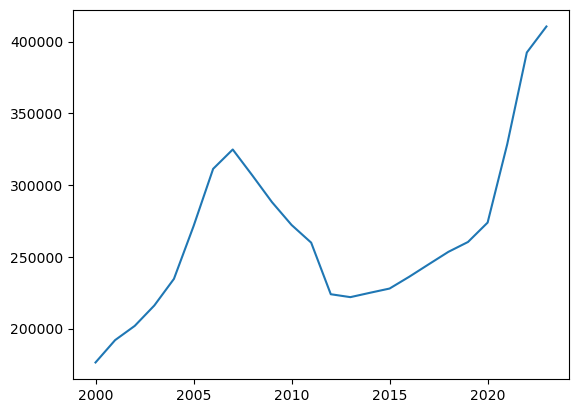

In [155]:
#Gather average property value for all 3 counties for each year to plot trends 
avgall = ncpvalclean.groupby('Year')['Value'].mean()
avgall
avgyear = ncpvalclean['Year'].unique()
plt.plot(avgyear, avgall)


In [192]:
infl
inf = infl[['TIME', 'Value']].copy()
inf
Zillowpval = avgall.to_frame()
#inf['Zillow Prop Values'] = avgall
inf.rename(columns = {'TIME':'Year'}, inplace = True) 
inf.rename(columns = {'Value':'CPI Rate'}, inplace = True) 
inf
Zillowpval.reset_index()
pvalinfl = pd.merge(inf, Zillowpval, on = 'Year')
pvalinfl
#real price of a good = (nominal price of a good/CPI) x 100
#pvalinfl['Adjusted Value'] = ((pvalinfl['Value'] * pvalinfl['CPI Rate']) / 100)
#pvalinfl['Adjusted Val'] = ((pvalinfl['Value'] * pvalinfl['CPI Rate']))
pvalinfl['%CPI'] = ((pvalinfl['CPI Rate'] / 100))
pvalinfl['Adjusted Vals'] = ((pvalinfl['Value'] * pvalinfl['%CPI']) + pvalinfl['Value'])



pvalinfl

,Year,CPI Rate,Value,%CPI,Adjusted Vals
0,2000,3.376857,176324.107984,0.033769,182278.320967
1,2000,4.067432,176324.107984,0.040674,183495.971175
2,2001,2.826171,191918.909669,0.028262,197342.866238
3,2001,3.675175,191918.909669,0.036752,198972.265458
4,2002,1.586032,201816.094129,0.015860,205016.961963
5,2002,2.783710,201816.094129,0.027837,207434.068923
6,2003,2.270095,216055.132264,0.022701,220959.789019
7,2003,2.484033,216055.132264,0.024840,221422.013047
8,2004,2.677237,234594.76269,0.026772,240875.420477
9,2004,2.416745,234594.76269,0.024167,240264.319888


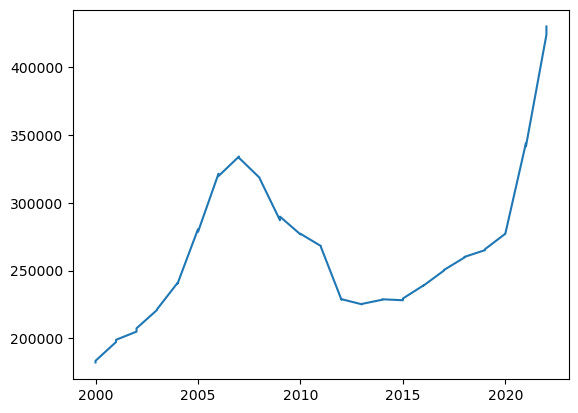

In [191]:
plt.plot(pvalinfl['Year'], pvalinfl['Adjusted Vals'])


In [22]:
#Info provided on documentation:
#https://tidesandcurrents.noaa.gov/sltrends/sltrends_station.shtml?id=8652587
#Data collected by NOAA Station 8652587, Oregon Inlet Marina, North Carolina.
#Monthly mean sea levels with the average seasonal cycle removed. 
#The values are in meters relative to the most recent Mean Sea Level datum established by CO-OPS.
#Column values are the Year; Month; Monthly Mean; Relative Sea Level Trend Line; Higher 95% Confidence Interval; and Lower 95% Confidence Interval.
sea_levels


,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
0,1977,5,-0.109,-0.082,-0.049,-0.114
1,1977,6,-0.032,-0.081,-0.049,-0.114
2,1977,7,-0.100,-0.081,-0.048,-0.113
3,1977,8,-0.053,-0.080,-0.048,-0.113
4,1977,9,-0.077,-0.080,-0.048,-0.112
...,...,...,...,...,...,...
364,2023,7,0.217,0.168,0.188,0.149
365,2023,8,0.152,0.169,0.188,0.149
366,2023,9,0.221,0.169,0.189,0.150
367,2023,10,0.224,0.170,0.189,0.150


Year
 Month
 Monthly_MSL
 Linear_Trend
 High_Conf.
 Low_Conf.


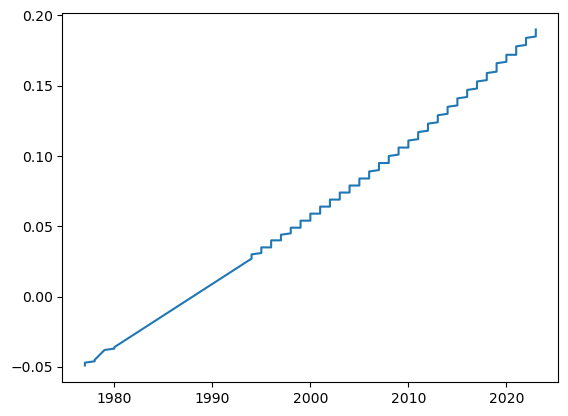

In [23]:
for col in sea_levels.columns:
    print(col)


plt.plot(sea_levels['Year'], sea_levels[' High_Conf.'])
#sea_levels.plot(x='Year', y='', ylabel = 'Monthly Sea Level Change (m)', title = 'Sea Level Change Over Time')

,Area Name;Year;External Area;External County;In-Migration;Out-Migration;Net Migration;Gross Migration
0,Alamance County;2017;Arizona;Pima County;0.0;9...
1,Alamance County;2017;California;Alameda County...
2,Alamance County;2017;Georgia;Muscogee County;2...
3,Alamance County;2017;Iowa;Decatur County;0.0;3...
4,Alamance County;2017;Massachusetts;Plymouth Co...
...,...
193440,Yancey County;2020;Montana;Cascade County;15.0...
193441,Yancey County;2020;New Jersey;Sussex County;11...
193442,Yancey County;2020;North Carolina;Gaston Count...
193443,Yancey County;2020;North Carolina;Madison Coun...


In [27]:
#Download local copy of Realtor_county.csv
#To run Kayla's code below 
census = Path("census_county.csv")
census_df = pd.read_csv(census)

reduced_census = census_df[["Area Name", "Year", "Net Migration"]]

cleaned_df = reduced_census.loc[(census_df['Area Name']=='Carteret County') | 
                                 (census_df['Area Name']=='Dare County')| 
                                 (census_df['Area Name']=='Hyde County')]


cleaned_df

#prop_value = Path("realtor_county.csv")
#prop_value_df = pd.read_csv(prop_value)
#prop_value_reduced = prop_value_df[['month_date_yyyymm', 'county_name', 
#                                    'average_listing_price', 'total_listing_count' ]]
#prop_value_reduced
#prop_value_reduced.set_index('county_name') 
#cleaned_prop_df = prop_value_reduced.loc[(prop_value_reduced['county_name']=='carteret, nc') | 
#                                 (prop_value_reduced['county_name'] == 'dare, nc')| 
#                                 (prop_value_reduced['county_name']=='hyde, nc')]

 
#cleaned_prop_df
#cleaned_prop_df.set_index('county_name') 

,Area Name,Year,Net Migration
285,Carteret County,2017,-9.0
286,Carteret County,2017,-35.0
287,Carteret County,2017,-90.0
288,Carteret County,2017,2.0
289,Carteret County,2017,1.0
...,...,...,...
192326,Hyde County,2020,-6.0
192327,Hyde County,2020,14.0
192328,Hyde County,2020,4.0
192329,Hyde County,2020,1.0


In [29]:
seaandmigration = pd.merge(sea_levels,cleaned_df, on= 'Year')
seaandmigration

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.,Area Name,Net Migration
0,2010,1,0.158,0.095,0.106,0.084,Carteret County,27.0
1,2010,1,0.158,0.095,0.106,0.084,Carteret County,-67.0
2,2010,1,0.158,0.095,0.106,0.084,Carteret County,-42.0
3,2010,1,0.158,0.095,0.106,0.084,Carteret County,-6.0
4,2010,1,0.158,0.095,0.106,0.084,Carteret County,-4.0
...,...,...,...,...,...,...,...,...
53242,2020,12,0.207,0.154,0.172,0.137,Hyde County,-6.0
53243,2020,12,0.207,0.154,0.172,0.137,Hyde County,14.0
53244,2020,12,0.207,0.154,0.172,0.137,Hyde County,4.0
53245,2020,12,0.207,0.154,0.172,0.137,Hyde County,1.0


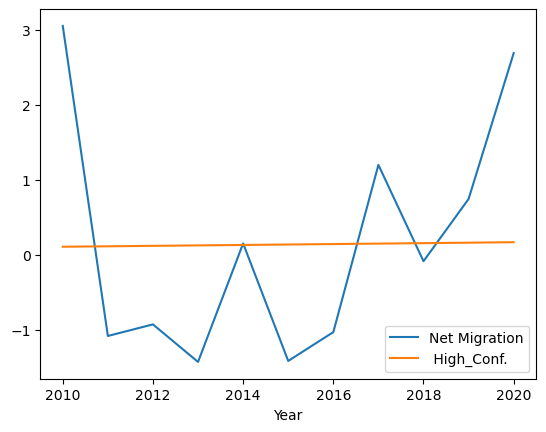

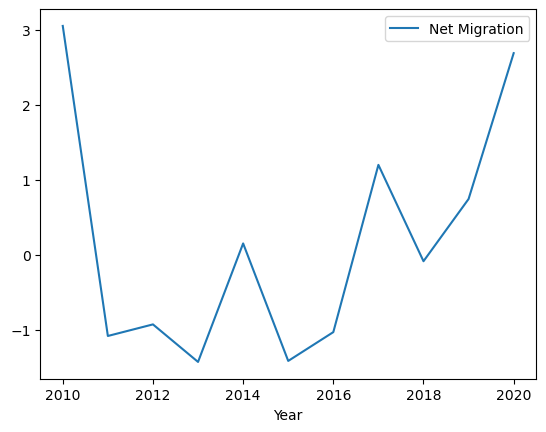

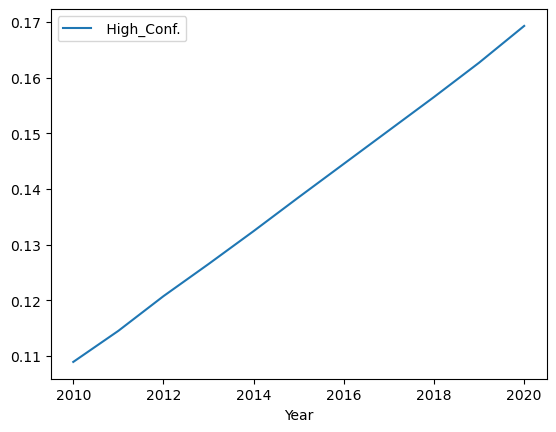

In [70]:
#plt.plot(seaandmigration['Year'], (seaandmigration[' High_Conf.'], seaandmigration['Net Migration']))
#sea1020 = sea_levels.loc[sea_levels['Year'].range('2010','2020')]
#sea1020 = sea_levels['Year'].loc['2010':'2020'] 

meanmigr = seaandmigration.groupby('Year')['Net Migration'].mean()
meanhc = seaandmigration.groupby('Year')[' High_Conf.'].mean()
avgdf = meanmigr.to_frame()
avgdf1 = meanhc.to_frame()
#seaandmigration['Avg Yearly Sea Level Change (m)'] = meanhc
#seaandmigration['Avg Yearly Net Migration'] = meanmigr
#plot1 = cleaned_df.plot(x='Year', y=meanmigr)
#plot2 = seaandmigration.plot(x=meanmigr, y=meanhc)

#plot3 = plt.plot(meanhc,meanmigr)
avgsdf = pd.merge(avgdf,avgdf1, on='Year')
avgsdf.reset_index(inplace=True)
avgsdf
plot4 = avgsdf.plot(x='Year', y=['Net Migration', ' High_Conf.'])
plot1 = avgsdf.plot(x='Year', y='Net Migration')
plot2 = avgsdf.plot(x='Year', y=' High_Conf.')



In [77]:
pop

,id,name,type,variable,value,year
0,0100000US,United States,nation,count,3.115366e+08,2013
1,0100000US,United States,nation,change,7.760000e-01,2013
2,0100000US,United States,nation,count,3.091387e+08,2012
3,0100000US,United States,nation,change,8.270000e-01,2012
4,0100000US,United States,nation,count,3.066038e+08,2011
...,...,...,...,...,...,...
1195273,310M200US19700,"Deming, NM Micro Area",msa,change,-2.261606e-01,2018
1195274,310M200US19740,"Denver-Aurora-Lakewood, CO Metro Area",msa,change,1.841473e+00,2018
1195275,310M200US19760,"DeRidder, LA Micro Area",msa,change,4.672386e-01,2018
1195276,310M200US19780,"Des Moines-West Des Moines, IA Metro Area",msa,change,1.779453e+00,2018


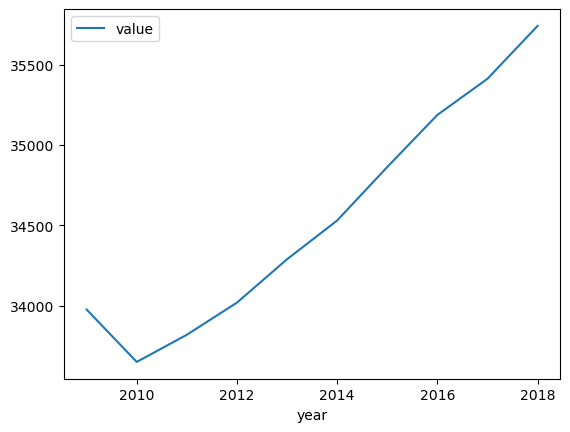

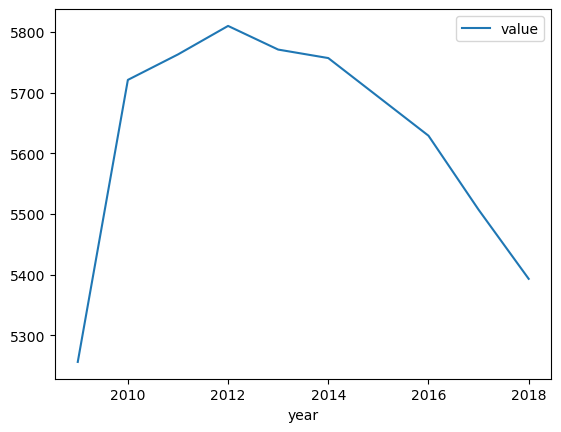

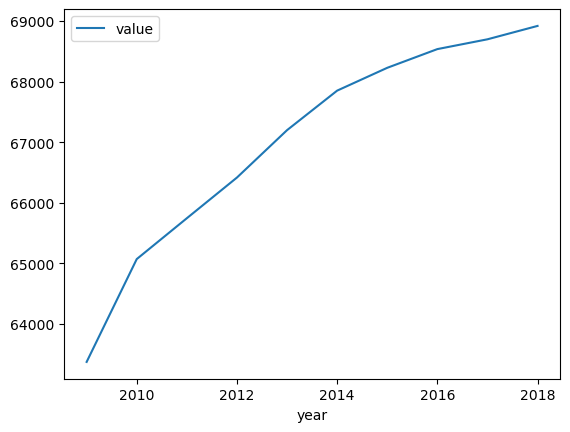

In [115]:
pop1 = pop.loc[(pop['type']=='county') ] 
#pop2 =pop1.loc[(pop1['name']=='Carteret County, North Carolina')] | (pop1['name']=='Dare County, North Carolina')# | (pop1['name']=='Hyde County, North Carolina')# | (pop1['variable']=='count')
pop2 = pop1.loc[(pop1['name']=='Carteret County, North Carolina') | 
                                 (pop1['name']=='Dare County, North Carolina')| 
                                 (pop1['name']=='Hyde County, North Carolina')]
pop2
pop3 = pop2.loc[(pop2['variable']== 'count')]
cleanpop = pop3.groupby(['year', 'name'])['value'].mean()
darepop = pop3.loc[(pop3['name']=='Dare County, North Carolina')]
hydepop = pop3.loc[(pop3['name']=='Hyde County, North Carolina')]
cartpop =pop3.loc[(pop3['name']=='Carteret County, North Carolina')]


dpop = darepop.sort_values('year')
hpop = hydepop.sort_values('year')
cpop = cartpop.sort_values('year')
plotd = dpop.plot(x='year', y='value')
ploth = hpop.plot(x='year', y='value')
plotc = cpop.plot(x='year', y='value')
#cpop = cleanpop.to_frame()



In [131]:
#Need to purge cell, bad data- only 2 years of temps

wtemp
nctemps = wtemp.loc[(wtemp['Station.State']=='North Carolina')] 
nctemps
nctemps['Station.City'].unique()
coastnctemp = nctemps.loc[(nctemps['Station.City']=='Cape Hatteras') | 
                                 (nctemps['Station.City']=='Wilmington')]
coastnctemp

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
206,0.16,2016-01-03,1,3,2016,Cape Hatteras,HSE,"Cape Hatteras, NC",North Carolina,50,56,44,21,4.43
211,0.63,2016-01-03,1,3,2016,Wilmington,ILM,"Wilmington, NC",North Carolina,48,56,40,32,5.03
521,1.47,2016-01-10,1,10,2016,Cape Hatteras,HSE,"Cape Hatteras, NC",North Carolina,51,56,45,15,9.17
526,0.34,2016-01-10,1,10,2016,Wilmington,ILM,"Wilmington, NC",North Carolina,47,54,39,14,9.60
836,1.33,2016-01-17,1,17,2016,Cape Hatteras,HSE,"Cape Hatteras, NC",North Carolina,47,57,36,28,8.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16005,1.77,2016-12-18,12,18,2016,Wilmington,ILM,"Wilmington, NC",North Carolina,51,59,42,20,6.50
16317,0.69,2016-12-25,12,25,2016,Cape Hatteras,HSE,"Cape Hatteras, NC",North Carolina,50,55,44,13,7.32
16322,0.27,2016-12-25,12,25,2016,Wilmington,ILM,"Wilmington, NC",North Carolina,48,59,36,18,6.20
16634,0.62,2017-01-01,1,1,2017,Cape Hatteras,HSE,"Cape Hatteras, NC",North Carolina,57,64,50,25,8.28


In [133]:
avgnctemps = coastnctemp.groupby(['Date.Year'])['Data.Temperature.Avg Temp'].mean()
avgnctemps

Date.Year
2016    64.903846
2017    54.000000
Name: Data.Temperature.Avg Temp, dtype: float64